# Future Matched Means Composites

In [10]:
import numpy
import numpy as np
from scipy.interpolate import interp1d
from svrimg.utils.get_tables import get_table
from svrimg.utils.get_images import get_img_list
from svrimg.mapping.map_helper import draw_box_plot, radar_norm

import pandas as pd
import glob
import pickle
import matplotlib.pyplot as plt
#import imageio.v2 as imageio

In [11]:
def _run_pmm_one_variable(
        input_matrix, max_percentile_level=100):
    """Applies PMM to one variable.
    E = number of examples (realizations over which to average)
    :param input_matrix: numpy array.  The first axis must have length E.  Other
        axes are assumed to be spatial dimensions.  Thus, input_matrix[i, ...]
        is the spatial field for the [i]th example.
    :param max_percentile_level: Maximum percentile.  No output value will
        exceed the [q]th percentile of `input_matrix`, where q =
        `max_percentile_level`.  Similarly, no output value will be less than
        the [100 - q]th percentile of `input_matrix`.
    :return: mean_field_matrix: numpy array of probability-matched means.  Will
        have the same dimensions as `input_matrix`, except without the first
        axis.  For example, if `input_matrix` is E x 32 x 32 x 12, this will be
        32 x 32 x 12.
    """

    # Pool values over all dimensions and remove extremes.
    pooled_values = numpy.ravel(input_matrix)
    pooled_values = numpy.sort(pooled_values)

    max_pooled_value = numpy.percentile(pooled_values, max_percentile_level)
    pooled_values = pooled_values[pooled_values <= max_pooled_value]

    min_pooled_value = numpy.percentile(
        pooled_values, 100 - max_percentile_level)
    pooled_values = pooled_values[pooled_values >= min_pooled_value]

    # Find ensemble mean at each grid point.
    mean_field_matrix = numpy.mean(input_matrix, axis=0)
    mean_field_flattened = numpy.ravel(mean_field_matrix)

    # At each grid point, replace ensemble mean with the same percentile from
    # pooled array.
    pooled_value_percentiles = numpy.linspace(
        0, 100, num=len(pooled_values), dtype=float)
    mean_value_percentiles = numpy.linspace(
        0, 100, num=len(mean_field_flattened), dtype=float)

    sort_indices = numpy.argsort(mean_field_flattened)
    unsort_indices = numpy.argsort(sort_indices)

    interp_object = interp1d(
        pooled_value_percentiles, pooled_values, kind='linear',
        bounds_error=True, assume_sorted=True)

    mean_field_flattened = interp_object(mean_value_percentiles)
    mean_field_flattened = mean_field_flattened[unsort_indices]
    mean_field_matrix = numpy.reshape(
        mean_field_flattened, mean_field_matrix.shape)

    return mean_field_matrix

cmap, norm = radar_norm()

## Load Data

In [5]:
#iterate through the epochs
epochs = ['HIST', 'MID4p5', 'MID8p5', 'END4p5', 'END8p5']

for epoch in epochs:
    locals()[f'df_{epoch}'] = pd.concat(map(pd.read_csv, glob.glob(f'/home/scratch/jcorner1/Thesis/future_modes/modes/{epoch}/*')), ignore_index=True)

Cellular
Multicell
Linear
Other


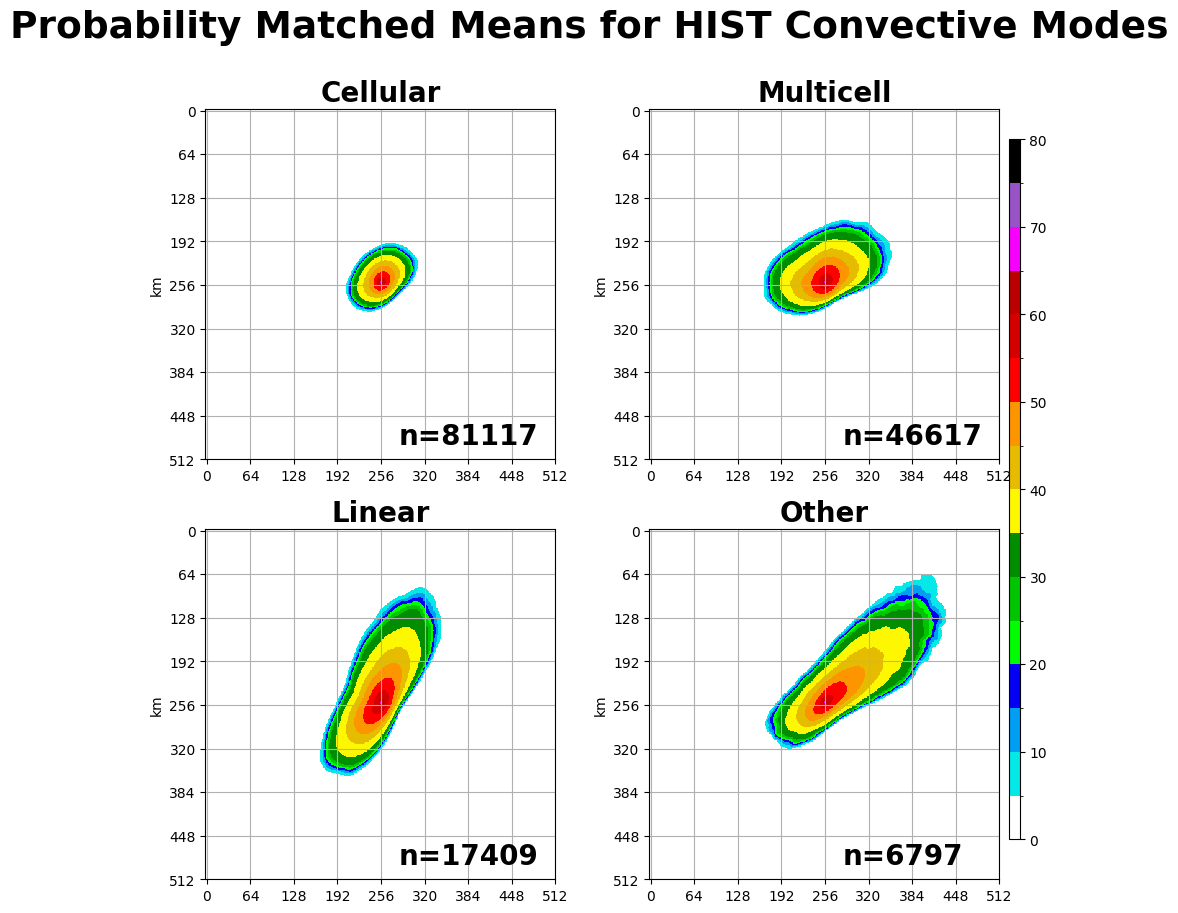

In [14]:
mode_labels = ['Cellular', 'Mixed Mode', 'Linear', 'Other']
fig = plt.figure(figsize=(10.5,10))
i = 1
plt.suptitle('Probability Matched Means for HIST Convective Modes', size=27).set_weight('bold')
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])

for cls in ['Cellular', 'Multicell', 'Linear', 'Other']:
    print(cls)
    class_ = df_HIST[df_HIST["Mode"]==cls].copy()
    image_data = []
    
    #
    for rid, row in class_.iterrows():

        # Open and append each image
        fname = f"/home/scratch/jcorner1/Thesis/future_modes/storm_images/HIST/{row.Filename}"   
        img = np.load(fname)
        image_data.append(img)
        
    ax = plt.subplot(2, 2, i)
    mmp = ax.imshow(np.flipud(_run_pmm_one_variable(image_data)), cmap=cmap, norm=norm)
    
    #
    ax.text(75, 130, "n={}".format(len(image_data)), fontsize=20).set_weight('bold')
    ax.set_title(cls, fontsize=20).set_weight('bold')
    ax.set_yticks(list(range(0, 153, 17)))
    ax.set_yticklabels(np.arange(0,523,64))
    ax.set_xticks(list(range(0, 153, 17)))
    ax.set_xticklabels(np.arange(0,523,64))
    #ax.set_xlabel("km")
    ax.set_ylabel("km")
    ax.grid()
    
    i = i + 1

    plt.colorbar(mmp, ax=ax, pad=0.01, cax=cbar_ax)
plt.savefig('/home/jcorner1/Future_Modes/Plots/Probs_Match_means_HIST.png', format='png', dpi=500, bbox_inches='tight')

Cellular
Multicell
Linear
Other


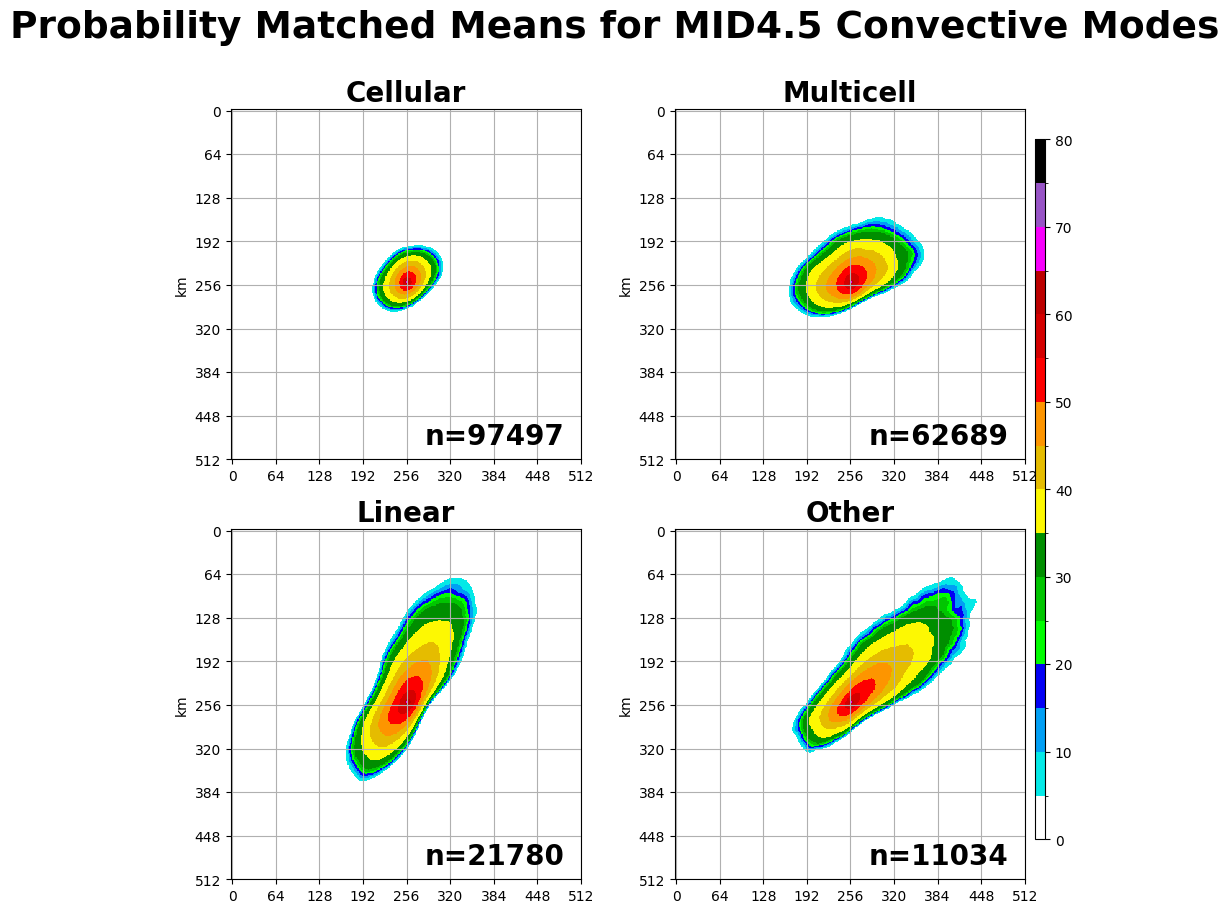

In [16]:
mode_labels = ['Cellular', 'Mixed Mode', 'Linear', 'Other']
fig = plt.figure(figsize=(10.5,10))
i = 1
plt.suptitle('Probability Matched Means for MID4.5 Convective Modes', size=27).set_weight('bold')
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])

for cls in ['Cellular', 'Multicell', 'Linear', 'Other']:
    print(cls)
    class_ = df_MID4p5[df_MID4p5["Mode"]==cls].copy()
    image_data = []
    
    #
    for rid, row in class_.iterrows():

        # Open and append each image
        fname = f"/home/scratch/jcorner1/Thesis/future_modes/storm_images/MID4p5/{row.Filename}"   
        img = np.load(fname)
        image_data.append(img)
        
    ax = plt.subplot(2, 2, i)
    mmp = ax.imshow(np.flipud(_run_pmm_one_variable(image_data)), cmap=cmap, norm=norm)
    
    #
    ax.text(75, 130, "n={}".format(len(image_data)), fontsize=20).set_weight('bold')
    ax.set_title(cls, fontsize=20).set_weight('bold')
    ax.set_yticks(list(range(0, 153, 17)))
    ax.set_yticklabels(np.arange(0,523,64))
    ax.set_xticks(list(range(0, 153, 17)))
    ax.set_xticklabels(np.arange(0,523,64))
    #ax.set_xlabel("km")
    ax.set_ylabel("km")
    ax.grid()
    
    i = i + 1

    plt.colorbar(mmp, ax=ax, pad=0.01, cax=cbar_ax)
plt.savefig('/home/jcorner1/Future_Modes/Plots/Probs_Match_means_mid4p5.png', format='png', dpi=500, bbox_inches='tight')

Cellular
Multicell
Linear
Other


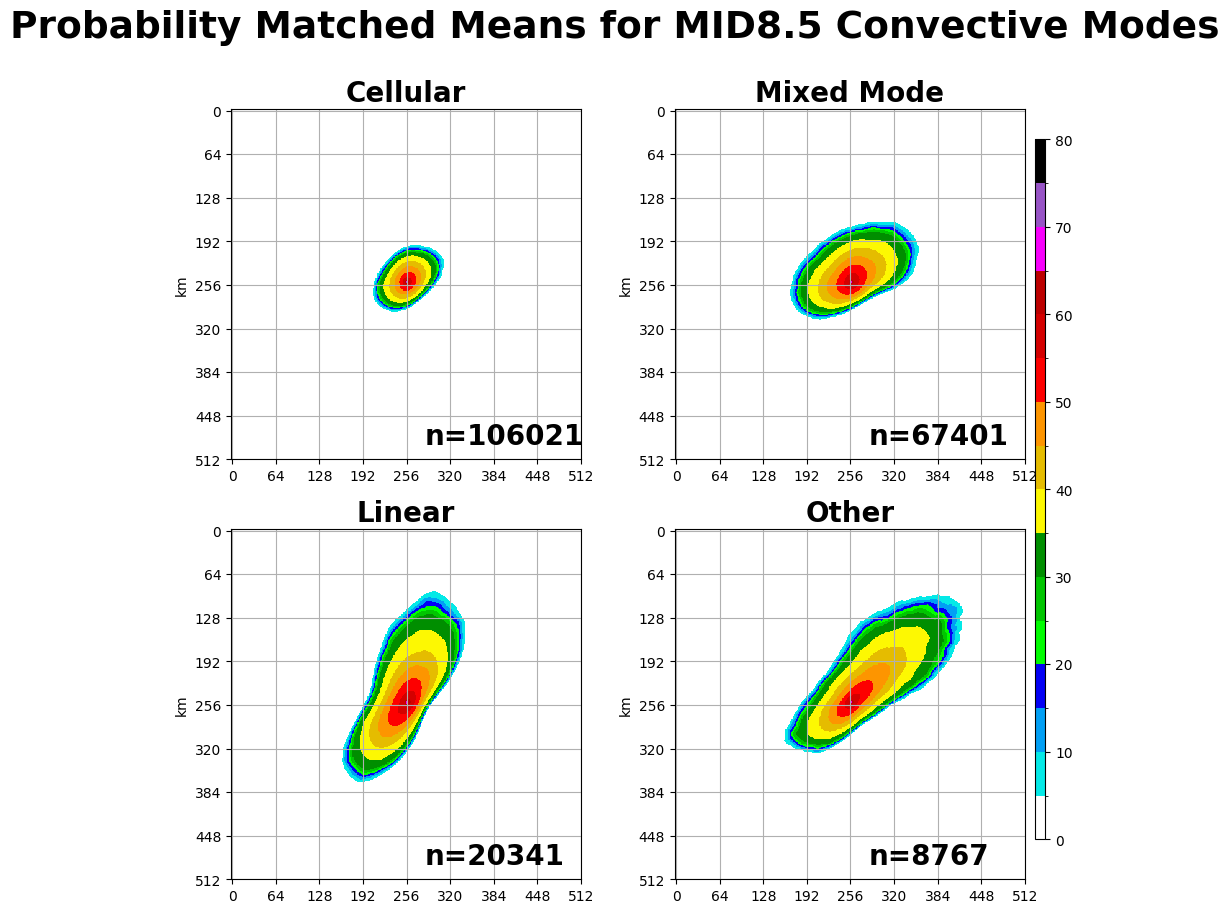

In [17]:
mode_labels = ['Cellular', 'Mixed Mode', 'Linear', 'Other']
fig = plt.figure(figsize=(10.5,10))
i = 1
plt.suptitle('Probability Matched Means for MID8.5 Convective Modes', size=27).set_weight('bold')
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])

for cls in ['Cellular', 'Multicell', 'Linear', 'Other']:
    print(cls)
    class_ = df_MID8p5[df_MID8p5["Mode"]==cls].copy()
    image_data = []
    
    #
    for rid, row in class_.iterrows():

        # Open and append each image
        fname = f"/home/scratch/jcorner1/Thesis/future_modes/storm_images/MID8p5/{row.Filename}"   
        img = np.load(fname)
        image_data.append(img)
        
    ax = plt.subplot(2, 2, i)
    mmp = ax.imshow(np.flipud(_run_pmm_one_variable(image_data)), cmap=cmap, norm=norm)
    
    #
    ax.text(75, 130, "n={}".format(len(image_data)), fontsize=20).set_weight('bold')
    ax.set_title(mode_labels[i-1], fontsize=20).set_weight('bold')
    ax.set_yticks(list(range(0, 153, 17)))
    ax.set_yticklabels(np.arange(0,523,64))
    ax.set_xticks(list(range(0, 153, 17)))
    ax.set_xticklabels(np.arange(0,523,64))
    #ax.set_xlabel("km")
    ax.set_ylabel("km")
    ax.grid()
    
    i = i + 1

    plt.colorbar(mmp, ax=ax, pad=0.01, cax=cbar_ax)
plt.savefig('/home/jcorner1/Future_Modes/Plots/Probs_Match_means_mid8p5.png', format='png', dpi=500, bbox_inches='tight')

Cellular
Multicell
Linear
Other


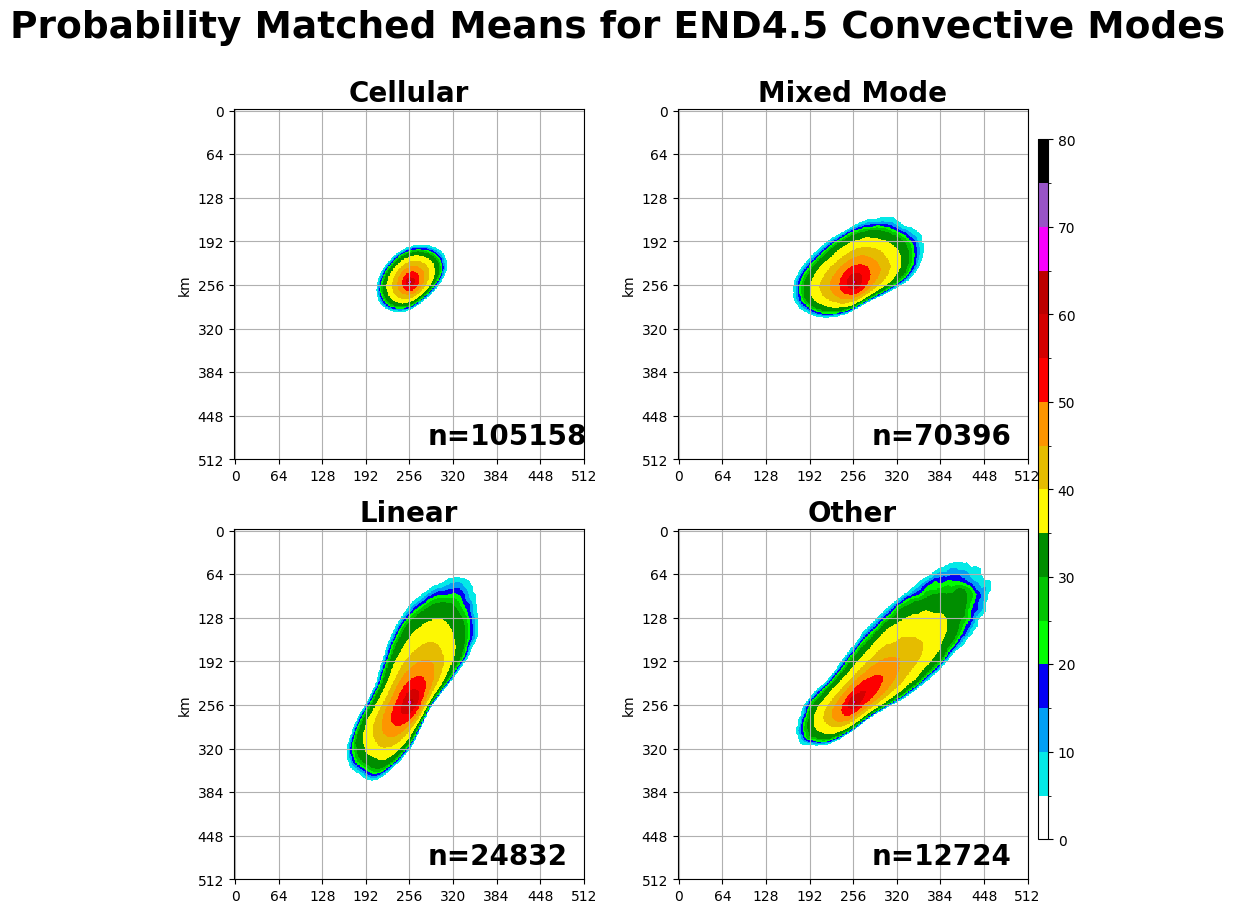

In [18]:
mode_labels = ['Cellular', 'Mixed Mode', 'Linear', 'Other']
fig = plt.figure(figsize=(10.5,10))
i = 1
plt.suptitle('Probability Matched Means for END4.5 Convective Modes', size=27).set_weight('bold')
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])

for cls in ['Cellular', 'Multicell', 'Linear', 'Other']:
    print(cls)
    class_ = df_END4p5[df_END4p5["Mode"]==cls].copy()
    image_data = []
    
    #
    for rid, row in class_.iterrows():

        # Open and append each image
        fname = f"/home/scratch/jcorner1/Thesis/future_modes/storm_images/END4p5/{row.Filename}"   
        img = np.load(fname)
        image_data.append(img)
        
    ax = plt.subplot(2, 2, i)
    mmp = ax.imshow(np.flipud(_run_pmm_one_variable(image_data)), cmap=cmap, norm=norm)
    
    #
    ax.text(75, 130, "n={}".format(len(image_data)), fontsize=20).set_weight('bold')
    ax.set_title(mode_labels[i-1], fontsize=20).set_weight('bold')
    ax.set_yticks(list(range(0, 153, 17)))
    ax.set_yticklabels(np.arange(0,523,64))
    ax.set_xticks(list(range(0, 153, 17)))
    ax.set_xticklabels(np.arange(0,523,64))
    #ax.set_xlabel("km")
    ax.set_ylabel("km")
    ax.grid()
    
    i = i + 1

    plt.colorbar(mmp, ax=ax, pad=0.01, cax=cbar_ax)
plt.savefig('/home/jcorner1/Future_Modes/Plots/Probs_Match_means_end4p5.png', format='png', dpi=500, bbox_inches='tight')

Cellular
Multicell
Linear
Other


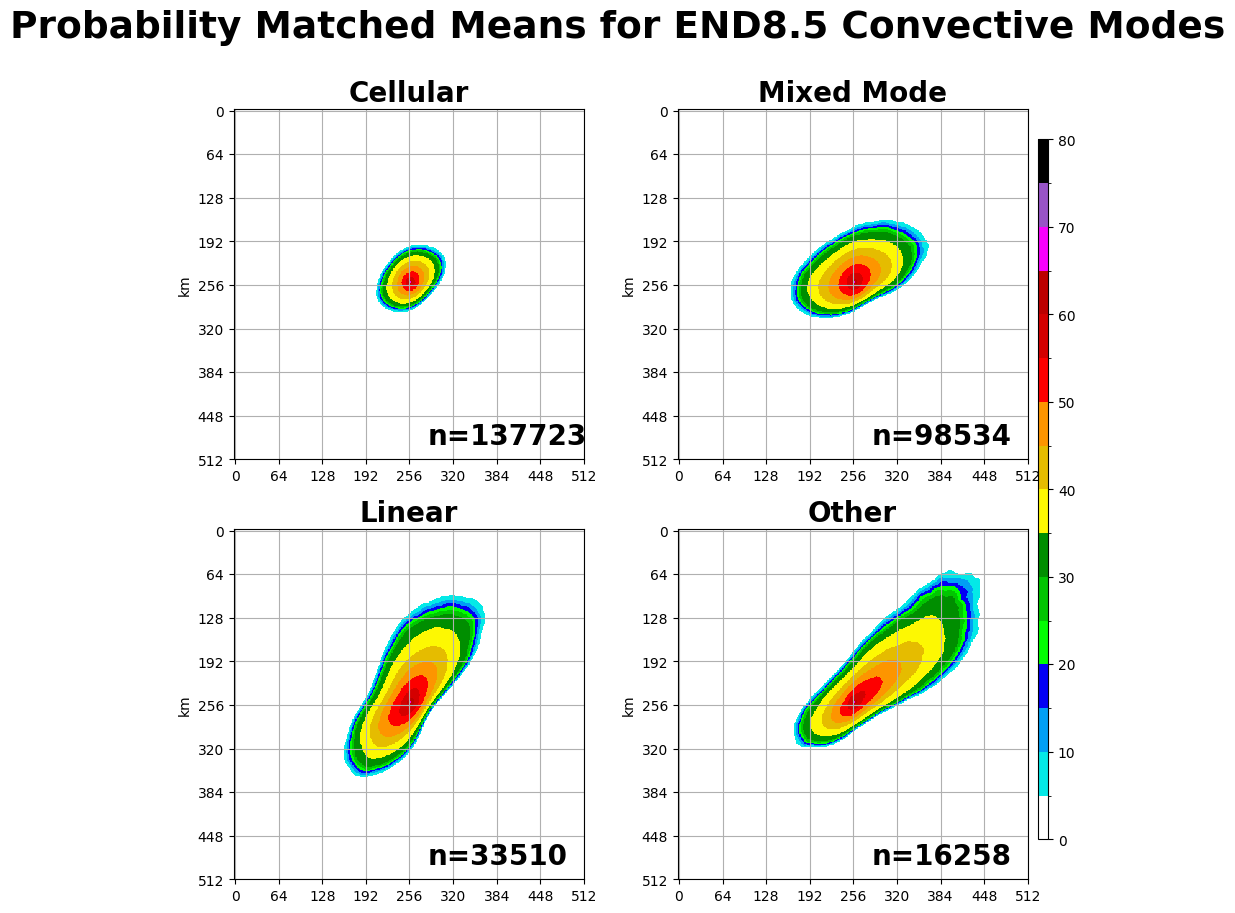

In [19]:
mode_labels = ['Cellular', 'Mixed Mode', 'Linear', 'Other']
fig = plt.figure(figsize=(10.5,10))
i = 1
plt.suptitle('Probability Matched Means for END8.5 Convective Modes', size=27).set_weight('bold')
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])

for cls in ['Cellular', 'Multicell', 'Linear', 'Other']:
    print(cls)
    class_ = df_END8p5[df_END8p5["Mode"]==cls].copy()
    image_data = []
    
    #
    for rid, row in class_.iterrows():

        # Open and append each image
        fname = f"/home/scratch/jcorner1/Thesis/future_modes/storm_images/END8p5/{row.Filename}"   
        img = np.load(fname)
        image_data.append(img)
        
    ax = plt.subplot(2, 2, i)
    mmp = ax.imshow(np.flipud(_run_pmm_one_variable(image_data)), cmap=cmap, norm=norm)
    
    #
    ax.text(75, 130, "n={}".format(len(image_data)), fontsize=20).set_weight('bold')
    ax.set_title(mode_labels[i-1], fontsize=20).set_weight('bold')
    ax.set_yticks(list(range(0, 153, 17)))
    ax.set_yticklabels(np.arange(0,523,64))
    ax.set_xticks(list(range(0, 153, 17)))
    ax.set_xticklabels(np.arange(0,523,64))
    #ax.set_xlabel("km")
    ax.set_ylabel("km")
    ax.grid()
    
    i = i + 1

    plt.colorbar(mmp, ax=ax, pad=0.01, cax=cbar_ax)
plt.savefig('/home/jcorner1/Future_Modes/Plots/Probs_Match_means_end8p5.png', format='png', dpi=500, bbox_inches='tight')